# What to watch next?

## Background reading:
**An Introduction to Statistical Learning Book Sections**: 2.2 Assessing Model Accuracy (includes: 2.2.1 Measuring the Quality of fit,  2.2.2 The Bias-Variance Tradeoff, 2.2.3 The classification setting (K-Nearest Neighbors)) 12.3 Missing Values and Matrix Completion (Recommneder Systems pp. 514-516) 

**The Ethical Algorithm Book**, page 22 to 26 (ANONYMIZED DATA ISN'T)

## Dataset:
The example on github uses the movie rating database from 
https://grouplens.org/datasets/movielens/ 


2 Datasets: Movies.csv and Ratings.csv  

From Movies we extract the columns with attributes:
1. Movie ID
2. Title

From Ratings we extract the columns:
1. Movie ID
2. User ID
3. Rating
The class being used for the recommendation is the column “rating” 

**Classes**: Average Rating by all users


### In this lesson:

#### K-Nearest Neighbors Algorithm	
#### Inequality and Unpredictability of Success (The Music Lab Experiment)	
#### The Netflix Prize	


## Essence of Data

### K-Nearest Neighbors Algorithm


### What is K Nearest Neighbor?
K Nearest Neighbor is a supervised machine learning algorithm that can be used for classification and regression.

KNN is ideal for data mining because it does not perform any calculations with the training data, it just stores the data. Once a query is performed on the dataset, the algorithm will build the appropriate model.

**Examples of application**: stock market prediction, bank loan approval, pattern recognition, and online shopping ad recommendations, facility location

**How does K Nearest Neighbors work?**

![](../../../fig/KNN/fig1.png)

KNN uses a distance based function (ie. euclidean) to calculate the similarity between the test instance and the existing points on the model graph.
KNN essentially has a voting mechanism to determine the class that a data point belongs to. The class with the most votes wins and the point is assigned to that class.

KNN doesn't make assumptions about the underlying statistical distribution that the data may have.
Ex: In the movie recommender algorithm cosine similarity is being used as the distance function

![](../../../fig/KNN/fig2.png)

**Two types of problems:**
**Classification-** The input instances (from the training data) are classified based on their discrete class labels (whatever parameter we are trying to predict). 

**Regression-** The input instances are used to predict a non-discrete number (such as predicting a person’s weight given their height, age, and gender)

**What assumptions are made?**
The algorithm assumes that data points clustered near each other are similar and therefore have the same class.

**What are the issues that these assumptions can cause?**
The accuracy depends on the quality of the data or the test instance data will not be accurately classified.

**Pros of K-Nearest Neighbors:**
- It can handle multi-class data
- It can flexibly handle different distance functions

**What is the difference between K-Nearest Neighbors and K-Means**
KNN is a supervised algorithm used for classification or regression based on feature similarity.

K-Means is an unsupervised algorithm used for clustering of data points with no prelabeled class. It divides the data points into “similar” groups.

**Example applications:** Delivery route optimization, ride share app analysis to identify traffic patterns throughout the day, Automatic clustering of IT alerts for prioritization

![](../../../fig/KNN/fig3.png)

![](../../../fig/KNN/fig4.png)

**Supervised learning:** The algorithm is trained using data with class labels.
Types of problems: classification and regression

**Unsupervised learning:** The algorithm is trained using data without class labels.
Types of problems: clustering and association

**Reinforcement learning:** The algorithm must make the decision with the best future knowledge outcome. The model learns by getting feedback on the past decision outcomes.
Types of problems: Exploitation or exploration

**The exploitation-exploration tradeoff:**
Article By professional data engineer: https://ekababisong.org/the-exploration-exploitation-trade-off/ 
The objective is to maximize the cumulative reward. The agent can either exploit the known optimal action (given what is already known) or explore the unknown and potentially be rewarded with new information.

**Exploitation:** To choose the action that seems optimal, given the information already known.
Example in movie database: Should we recommend more popular movies to users? Netflix does this by recommending their top 10 trending shows/movies by country

**Exploration:** To make the less optimal decision, given the assumption that the information already known is inaccurate and learning more information could improve future decision making outcomes.
Example in movie database: Should we take a risk and recommend less popular movies to users in order to get more ratings for them and learn more?

In the movie industry a movie being “popular” could impact box office performance and award show consideration. Exploration could be advantageous to get more reviews for less popular movies, however this is a risk because we do not have as much information (number of ratings) to base this decision on. A streaming service such as Netflix may use exploitation within recommender systems to recommend movies they have produced to influence the popularity. 

Amazon has recieved criticism for using exploitation within a similar recommender system to have products it manufactures recommended first, even if similar products from other manufacturers are more popular or more highly rated. Critics say that this makes Amazon too powerful, that they cannot serve both as a marketplace for goods to be sold and as a competitor within that marketplace.

Article about Netflix algorithm and personalized recommender systems: 
https://www.wired.co.uk/article/how-do-netflixs-algorithms-work-machine-learning-helps-to-predict-what-viewers-will-like 

**Related Concepts - Decision Boundaries, model fit, model flexibility, variance and bias**

![Figure from textbook page 41](../../../fig/KNN/fig5.png)

**Variance** is the amount that the model estimate f would change if different training data was used.
**Bias** is the error that is introduced to the model from estimating a real life problem.

![Figure from textbook page 41](../../../fig/KNN/fig6.png)

**Decision boundary** indicates where the cutoff for one class starts and another begins. 

**Model flexibility** is the model’s ability to increase the degrees of freedom available to the model in order to fit the training data.

A **flexible model** will have a greater number of estimation parameters and have a more non-linear decision boundary.

An **inflexible model** will have a lower number of estimation parameters and have a more linear decision boundary

The smaller that K is, the more flexible (non linear) the decision boundary line will be. This corresponds to a classification model with low bias but very high variance. The model is finding patterns in the data that may or may not exist since K is so low.

As a model’s flexibility decreases, variance will decrease and bias will increase. In order to have a model with the best fit we want to have low bias and low variance so the K we choose will need to be picked carefully. 


### Code to Analyze

In [1]:
import pandas as pd
import math
import random
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
#fuzzy needs to be added to the library
#open terminal and paste: conda install -c conda-forge fuzzywuzzy
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Load the movies and rating datasets
movies = '../../../data/movies.csv'
ratings = '../../../data/ratings.csv'
df_movies = pd.read_csv(movies, usecols = ['movieId','title'], dtype = {'movieId': 'int32', 'title':'str'})
df_ratings = pd.read_csv(ratings, usecols = ['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [3]:
#check descriptive statistics of the movie ratings
df_ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042541
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [4]:
#checking both datasets for null values
df_movies.isna().sum()
df_ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [5]:
#check movie title dataset
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
#check ratings dataset
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
#print the number of users and movies
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 610 unique users and 9724 unique movies in this data set


In [8]:
#beginning of data exploratory analysis
#get count
df_ratings_count = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_count

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [9]:
#merge movies and ratings datasets
movies_ratings_dataset = pd.merge(df_movies, df_ratings, how='inner', on='movieId')
movies_ratings_dataset.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [10]:
#group the merged dataset by userId and movie title
merged_dataset = movies_ratings_dataset.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})
merged_dataset.head()

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


In [11]:
#count all non-zero ratings
rating_count_df = pd.DataFrame(merged_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.50,1370
1.00,2811
1.50,1791
2.00,7550
2.25,1
2.50,5549
3.00,20047
3.50,13134
4.00,26817


Text(0, 0.5, 'Frequency')

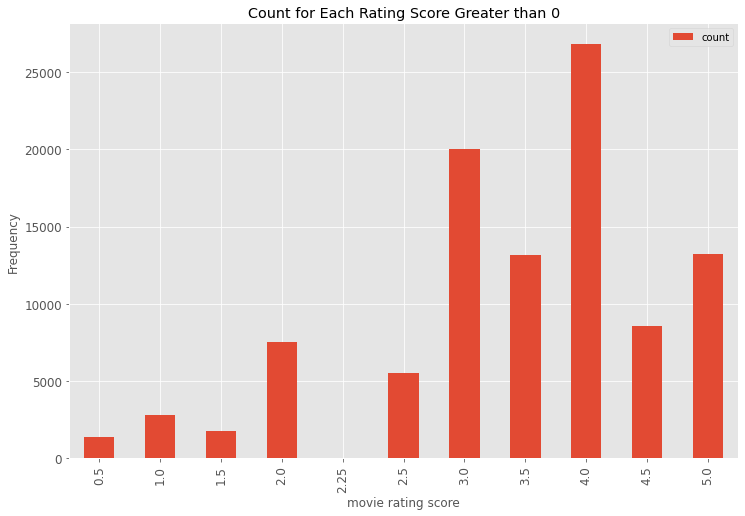

In [12]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score Greater than 0',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("Frequency")

In [13]:
#check number of 0 ratings (unseen by individual users)
total_count = num_items * num_users
zero_count = total_count-merged_dataset.shape[0]
zero_count

5830808

In [14]:
#include counts of zero rating within ratings_count_df
rating_count_df = rating_count_df.append(
    pd.DataFrame({'count': zero_count},index=[0.0]),
    verify_integrity=True,
).sort_index()
rating_count_df

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21380/4160613130.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_count_df = rating_count_df.append(


,count
0.00,5830808
0.50,1370
1.00,2811
1.50,1791
2.00,7550
2.25,1
2.50,5549
3.00,20047
3.50,13134
4.00,26817


In [15]:
# add log count
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
0.00,5830808,15.578666
0.50,1370,7.222566
1.00,2811,7.941296
1.50,1791,7.490529
2.00,7550,8.929303
2.25,1,0.000000
2.50,5549,8.621373
3.00,20047,9.905835
3.50,13134,9.482960
4.00,26817,10.196791


Text(0, 0.5, 'number of ratings')

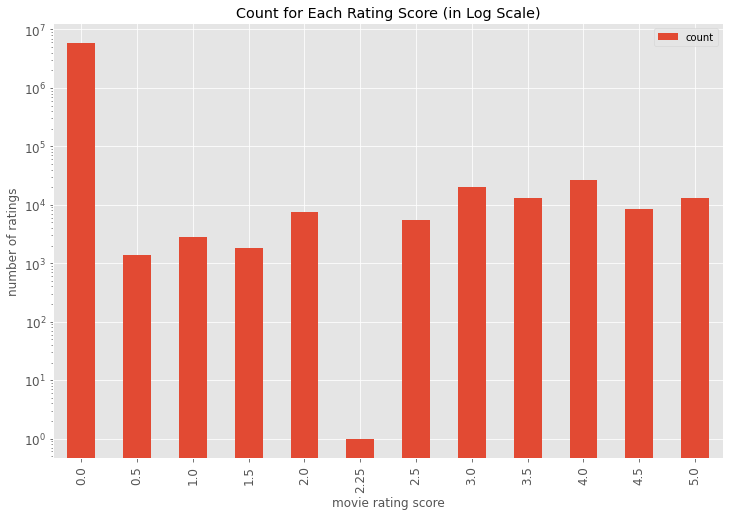

In [16]:
#plot on the logy scale
ax = rating_count_df[['count']].reset_index().rename(columns={'index': 'rating'}).plot(
    x='rating',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,
)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [17]:
#Combine datasets into Sparse Matrix
movies_users = df_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
matrix_movies_users = csr_matrix(movies_users.values)
matrix_movies_users
movies_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#create a model
#We are using cosine similarity as our distance metric and brute force as our algorithm
#select the top 10 nearest neighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 10)

In [19]:
#use the model to fit the sparse matrix
model_knn.fit(matrix_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [20]:
#writes the recommender function
def recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    idx = process.extractOne(movie_name, df_movies['title'])[2]
    print('Movie Selected: ', df_movies['title'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices = model.kneighbors(data[idx], n_neighbors = n_recommendations)
    for i in indices:
        print(df_movies['title'][i].where(i!=idx))

In [21]:
#test recommender with a movie
recommender('Jurassic park', matrix_movies_users, model_knn,10)

Movie Selected:  Jurassic Park (1993) Index:  418
Searching for recommendations.....
418                                     NaN
507       Terminator 2: Judgment Day (1991)
314                     Forrest Gump (1994)
97                        Braveheart (1995)
398                    Fugitive, The (1993)
334                            Speed (1994)
509                           Batman (1989)
615    Independence Day (a.k.a. ID4) (1996)
123                        Apollo 13 (1995)
337                        True Lies (1994)
Name: title, dtype: object


### Investigating if the average ratings for movies differ widely across genres

In [22]:
#Load the movies and rating datasets, this time including genres
movies = '../../../data/movies.csv'
ratings = '../../../data/ratings.csv'
df_movies_genres = pd.read_csv(movies, usecols = ['movieId','title','genres'], dtype = {'movieId': 'int32', 'title':'str','genres':'str'})
df_ratings = pd.read_csv(ratings, usecols = ['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [23]:
#merge movies with genres and ratings datasets
movies_ratings_genres_dataset = pd.merge(df_movies_genres, df_ratings, how='inner', on='movieId')
movies_ratings_genres_dataset.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [24]:
#group the merged dataset by genre
merged_dataset_genres = movies_ratings_genres_dataset.groupby(by=['genres'], as_index=False).agg({"rating":"mean"})
merged_dataset_genres.head()

,genres,rating
0,(no genres listed),3.489362
1,Action,2.935484
2,Action|Adventure,3.706306
3,Action|Adventure|Animation,3.583333
4,Action|Adventure|Animation|Children,3.410256


In [25]:
#sort genres by rating, highest to lowest
genres_sorted_by_rating = merged_dataset_genres.sort_values(by=['rating'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
genres_sorted_by_rating.head()

,genres,rating
638,Comedy|Crime|Drama|Horror,5.0
440,Adventure|Comedy|Fantasy|Musical,5.0
547,Animation|Children|Mystery,5.0
575,Animation|Drama|Sci-Fi|IMAX,5.0
467,Adventure|Drama|Fantasy|Horror|Sci-Fi,5.0


In [26]:
#check the data types
genres_sorted_by_rating.dtypes

genres     object
rating    float32
dtype: object

In [27]:
#drop all rows with more than one genre, and display the top 5 highest rated genres
single_genres_by_rating = genres_sorted_by_rating[~genres_sorted_by_rating.genres.str.contains("|", regex= False)]
single_genres_by_rating.head()

,genres,rating
904,Film-Noir,4.071429
515,Animation,3.957143
799,Documentary,3.835017
887,Fantasy,3.704545
812,Drama,3.688841


In [28]:
#display the bottom 5 lowest rated genres
single_genres_by_rating.tail()

,genres,rating
910,Horror,3.060156
938,Romance,3.048387
1,Action,2.935484
342,Adventure,2.710526
594,Children,2.500000


As you can see above, the Film-Noir genre is the most highly rated. It is not a very mainstream or popular genre, but the people who watch those films seem to greatly enjoy them. 

On the other hand, while some of the most popular movies are action or adventure films, the above data shows that the average movie rating in those categories is much lower. This is likely due to a high variance in the quality of action or adventure films; while some may be classic hits, others may be total flops, thereby bringing down the average rating for the genre.

In [29]:
#alternatively we can count movies with multiple genres under each genre
movies_ratings_genres_dataset_multi = movies_ratings_genres_dataset.assign(genres = movies_ratings_genres_dataset['genres'].str.split(r'|')).explode('genres')

In [30]:
#group the merged dataset by genre
merged_dataset_genres_multi = movies_ratings_genres_dataset_multi.groupby(by=['genres'], as_index=False).agg({"rating":"mean"})

In [31]:
#sort genres by rating, highest to lowest
genres_sorted_by_rating_multi = merged_dataset_genres_multi.sort_values(by=['rating'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
print(genres_sorted_by_rating_multi.head())
print(single_genres_by_rating.head())

         genres    rating
10    Film-Noir  3.920115
18          War  3.808294
7   Documentary  3.797785
6         Crime  3.658294
8         Drama  3.656184
          genres    rating
904    Film-Noir  4.071429
515    Animation  3.957143
799  Documentary  3.835017
887      Fantasy  3.704545
812        Drama  3.688841


In [32]:
#display the bottom 5 lowest rated genres
print(genres_sorted_by_rating_multi.tail())
print(single_genres_by_rating.tail())

      genres    rating
16    Sci-Fi  3.455721
1     Action  3.447984
4   Children  3.412956
5     Comedy  3.384721
11    Horror  3.258195
        genres    rating
910     Horror  3.060156
938    Romance  3.048387
1       Action  2.935484
342  Adventure  2.710526
594   Children  2.500000


In [33]:
comedy_movies = movies_ratings_genres_dataset_multi[movies_ratings_genres_dataset_multi.genres == 'Comedy']

movie_ratings = comedy_movies.groupby(by=['title'], as_index=False).agg({"rating":"mean", "userId":'count'})

best_to_worst = movie_ratings[movie_ratings.userId > 100].sort_values(by = 'rating', ascending = False)
print(best_to_worst.head(5))
print(best_to_worst.tail(5))

                                                  title    rating  userId
2689                         Princess Bride, The (1987)  4.232394     142
2713                                Pulp Fiction (1994)  4.197068     307
149   Amelie (Fabuleux destin d'Amélie Poulain, Le) ...  4.183333     120
1181                                Forrest Gump (1994)  4.164134     329
2268             Monty Python and the Holy Grail (1975)  4.161765     136
                                       title    rating  userId
2137                        Mask, The (1994)  3.184713     157
987   Dumb & Dumber (Dumb and Dumber) (1994)  3.060150     133
75         Ace Ventura: Pet Detective (1994)  3.040373     161
1520                       Home Alone (1990)  2.995690     116
328                    Batman Forever (1995)  2.916058     137


As you can see above, the Film-Noir genre is still the most highly rated. War movies, and Crime movies moved up in the ranking, while Animation and Fantasy moved down. 

With the new method of handling multiple genres, Children is now the least favorite genre, along with Adventure. Horror has moved up from the lowest rating to the fifth lowest, while Comedy moved from the second least favorite to no longer in the bottom five. Children moving in the ratings makes sense since it likely overlaps with other genres since 'children' is more of a target audience age than an actual descriptor of the genre. Children scoring lowly makes sense since, children likely do not have access to review the movies, and so the reviewers are likely parents who are watching movies because of their child and not because they have a true interest in the movie.

## AI in fabrics of society
### Inequality and Unpredictability of Success (The Music Lab Experiment)

The famous Music Lab experiment (Salganik, Dodds and Watts; 2006) shows that social influence leads to the inequality and unpredictability of success of creative content (pre-online streaming era). http://www.princeton.edu/~mjs3/musiclab.shtml 

*Salganik, Matthew J., Peter Sheridan Dodds, and Duncan J. Watts. "Experimental study of inequality and unpredictability in an artificial cultural market." science 311, no. 5762 (2006): 854-856.



### The Netflix Prize

The Netflix Prize competition offered $1 million for improving their existing system by 10\%. They released the anonymized data of more than a hundred million movie rating records corresponding to half a million users. Two weeks later, Arvind Narayanan and Vitaly Shmatikov showed that an adversary with little prior knowledge can identify many of the users in the released dataset (e.g, 99\% of users could be uniquely identified knowing the approximate dates of six of their ratings). More on the history of the prize and the ensuing privacy lawsuit: https://en.wikipedia.org/wiki/Netflix_Prize 

*Narayanan, Arvind, and Vitaly Shmatikov. "How to break anonymity of the netflix prize dataset." arXiv preprint cs/0610105 (2006). 
